In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
%matplotlib inline

In [67]:
df = pd.read_csv("./data/white.csv", sep=";", index_col=None)

In [68]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [69]:
all_columns = df.columns.values
factors = all_columns[0:len(all_columns) - 1]
X = df[factors].values
y = df["quality"].values

In [70]:
number_instances = df.shape[0]
ones_array = np.ones(number_instances)
ones_array = ones_array.reshape((number_instances, 1))
X = np.hstack((ones_array, X))

In [71]:
def Q(y, y_pred):
    return sum((y - y_pred) ** 2)

In [72]:
def stochastic_step(X, y, w, index,eta=0.01):
    X_ind = X[index]
    y_ind = y[index]
    gradiends = []
    for i in range(len(w)):
        gradiends.append(2 * X_ind[i] * (X_ind.dot(w) - y_ind))
    return w - eta * np.array(gradiends)

In [73]:
def predict(X, w):
    return np.round(np.dot(X, w))

In [74]:
def stochastic_descent(X, y, w_init, seed=42, max_iter=1e7, eta=1e-5, min_w_distr=1e-10):
    np.random.seed(seed)
    w = w_init
    current_w_distr = np.inf
    iteration = 0 
    errors = []
    while current_w_distr > min_w_distr and iteration < max_iter:
        random_index= np.random.randint(X.shape[0])
        w = stochastic_step(X, y, w, random_index, eta)
        #w_distr
        current_w_distr = np.linalg.norm(w - w_init)
        w_init = w
        #error
        y_pred = predict(X, w)
        errors.append(Q(y, y_pred))

        iteration += 1
    return w, errors

In [75]:
w_init = np.ones(12)
w, errors = stochastic_descent(X, y, w_init)

In [76]:
w

array([ 7.58431011e-01, -4.62336689e-02, -1.48036242e+00,  1.20266549e-01,
        2.61628010e-02,  7.54035465e-01,  2.61097851e-04,  5.82897918e-04,
        7.45551654e-01,  2.29770942e-01,  4.72556150e-01,  3.67355170e-01])

In [77]:
len(errors)

10000000

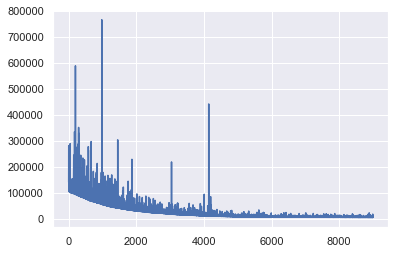

In [103]:
plt.plot(range(9000), errors[1000: 10000])

In [94]:
sample = X[40: 50]

In [80]:
w_last = np.array(w)

In [81]:
def predict_round(X, w):
    return np.round(np.dot(X, w))

In [97]:
predict_round(sample, w_last)

array([6., 6., 6., 6., 6., 6., 5., 5., 6., 6.])

In [98]:
y[40:50]

array([6, 6, 6, 6, 6, 7, 4, 5, 6, 5])

In [126]:
errors[-5:]

[3351.0, 3398.0, 3786.0, 3319.0, 3285.0]

In [106]:
errors[0:10]

[114964757.0,
 32510504.0,
 10880516.0,
 2334561.0,
 1313416.0,
 576557.0,
 638849.0,
 807939.0,
 954522.0,
 500021.0]